<a href="https://colab.research.google.com/github/Mumo-vicky/Week-9-Projects./blob/main/Spam_Prediction_(Naive_Bayes_Classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

## **Defining The Question**

This project aims to create a model using the Naive Bayes Classifier that is able to classify the messages as either spam or not based on different features of the message.

## **Defining Metric For Success**

For the success of the project, I should attain an accuracy score of 85% and above.

## **Understanding The Context**

Spam messages are a very usual occurence in this era. They become a nuisance and in most cases are malicious. Their detection and prevention is thus very important and helpful in the protection of information. Spam messages are different from normal messages, in that they potray certain unusual characteristics that raise an alarm. Having an accurate model that is able to classify an incoming message as spam or not is thus ideal.

## **Experimental Design**

I am going to go through the following steps in my project.
* Importing libraries and loading the data
* Checking and cleaning the data.
* Performing Exploratory Data Analysis
* Data pre-processing
* Building the kNN classification model 
* Evaluating the model
* Conclusion.
* Follow up Questions

## **Data Relevance**

The data contains various variables for determination of spam messages. It is thus relevat for our research.

# **Data Preparation**

## **Loading Libraries**

In [2]:
#loading the needed libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB

## **Data Exploration**

In [3]:
#loading the dataset to our environment.
columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'type']
spam = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', names=columns)

In [ ]:
#viewing the top.
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
#viewing the bottom
spam.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,type
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [ ]:
#viewing the columns for the dataset.
spam.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


The following are the columns present in our dataset:

The columns beginning wit 'word_freq' show the frequency of the word following the phrase;

The ones beginning with 'char_freq' show the frequency of the character following the phrase;


* word_freq_make
* word_freq_address
* word_freq_all
* word_freq_3d
* word_freq_our
* word_freq_over
* word_freq_remove
* word_freq_internet
* word_freq_order
* word_freq_mail
* word_freq_receive
* word_freq_will
* word_freq_people
* word_freq_report
* word_freq_addresses
* word_freq_free
* word_freq_business
* word_freq_email
* word_freq_you
* word_freq_credit
* word_freq_your
* word_freq_font
* word_freq_000
* word_freq_money
* word_freq_hp
* word_freq_hpl
* word_freq_george
* word_freq_650
* word_freq_lab
* word_freq_labs
* word_freq_telnet
* word_freq_857
* word_freq_data
* word_freq_415
* word_freq_85
* word_freq_technology
* word_freq_1999
* word_freq_parts
* word_freq_pm
* word_freq_direct
* word_freq_cs
* word_freq_meeting
* word_freq_original
* word_freq_project
* word_freq_re
* word_freq_edu
* word_freq_table
* word_freq_conference
* char_freq_;
* char_freq_(
* char_freq_[
* char_freq_!
* char_freq_$
* char_freq_#
* capital_run_length_average - average length of uninterrupted sequences of capital letters
* capital_run_length_longest - length of longest uninterrupted sequence of capital letters
* capital_run_length_total - total number of capital letters in the e-mail
* type - denotes whether the e-mail was considered spam (1) or not (0)

In [ ]:
#checking the rows and columns
spam.shape

(4601, 58)

We have 4601 rows and 58 columns in our dataset.

In [ ]:
#checking the dataset information
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [ ]:
#checking the number of unique values.
spam.nunique()

word_freq_make                 142
word_freq_address              171
word_freq_all                  214
word_freq_3d                    43
word_freq_our                  255
word_freq_over                 141
word_freq_remove               173
word_freq_internet             170
word_freq_order                144
word_freq_mail                 245
word_freq_receive              113
word_freq_will                 316
word_freq_people               158
word_freq_report               133
word_freq_addresses            118
word_freq_free                 253
word_freq_business             197
word_freq_email                229
word_freq_you                  575
word_freq_credit               148
word_freq_your                 401
word_freq_font                  99
word_freq_000                  164
word_freq_money                143
word_freq_hp                   395
word_freq_hpl                  281
word_freq_george               240
word_freq_650                  200
word_freq_lab       

In [ ]:
#checking for null values.
spam.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

There are no null values. This is good as it shows the dataset is fairly clean.

In [ ]:
#checking for duplicate values.
spam.duplicated().sum()

391

There are 391 duplicated values.

We are not going to remove these since some characteristics may be shared accros emails.

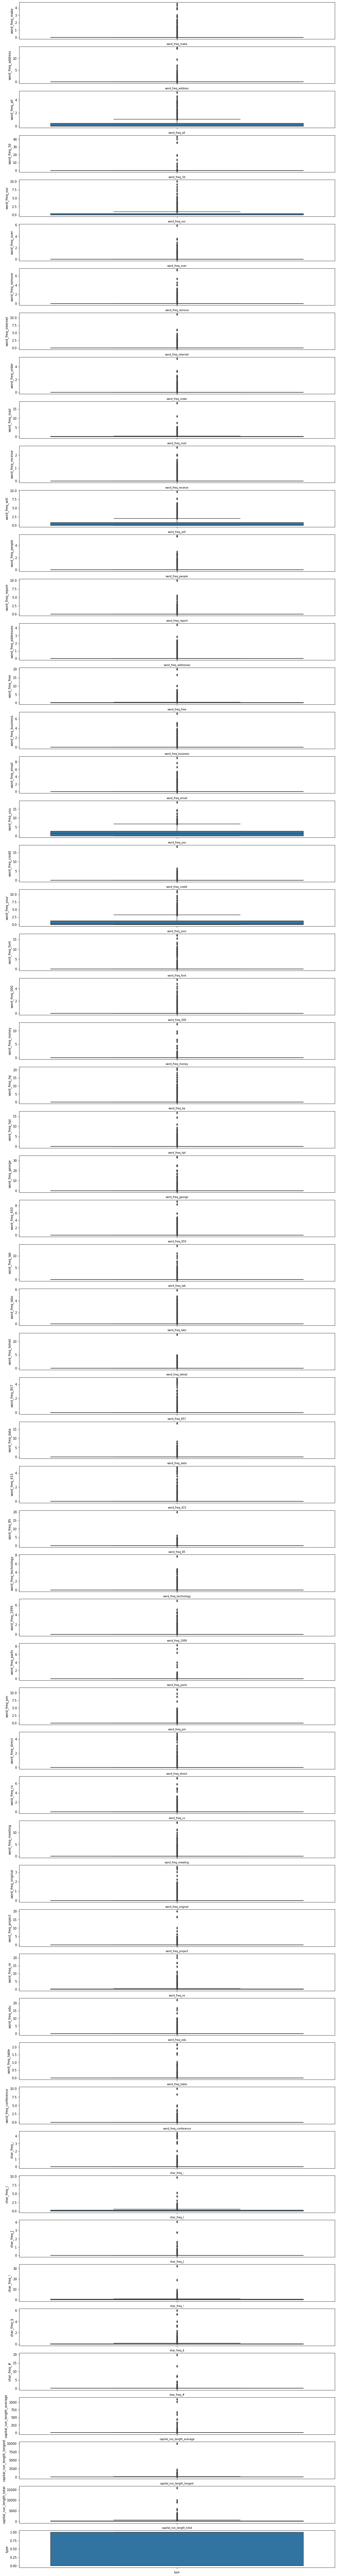

In [ ]:
#creating a loop for viewing the outliers.
fig, ax = plt.subplots(len(spam.columns), figsize = (18, 150))

for i, col_val in enumerate(spam.columns):

  sns.boxplot(y= spam[col_val], ax=ax[i])
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

We can see from the graphs plotted that there are cases of outliers in some of the columns. We will deal with this in the tidying of the dataset.

## **Tidying the Dataset**

In [4]:
#declaring the first and the third quantile.
Q1 = spam.quantile(0.25)
Q3 = spam.quantile(0.75)
IQR = Q3 - Q1
#creating a threshold for the values to keep in our dataset using our inter-quantile range. 
spam = spam[((spam < (Q1 - 1.5 * IQR)) |(spam > (Q3 + 1.5 * IQR))).any(axis=1)]
spam.shape

(4424, 58)

We can see thet the dataset has reduced. From 4601 to 4424. This means that we have dropped 177 outliers.

In [5]:
#converting the type column to the category datatype.
spam['type'] = spam['type'].astype('category')

# **Exploratory Data Analysis**

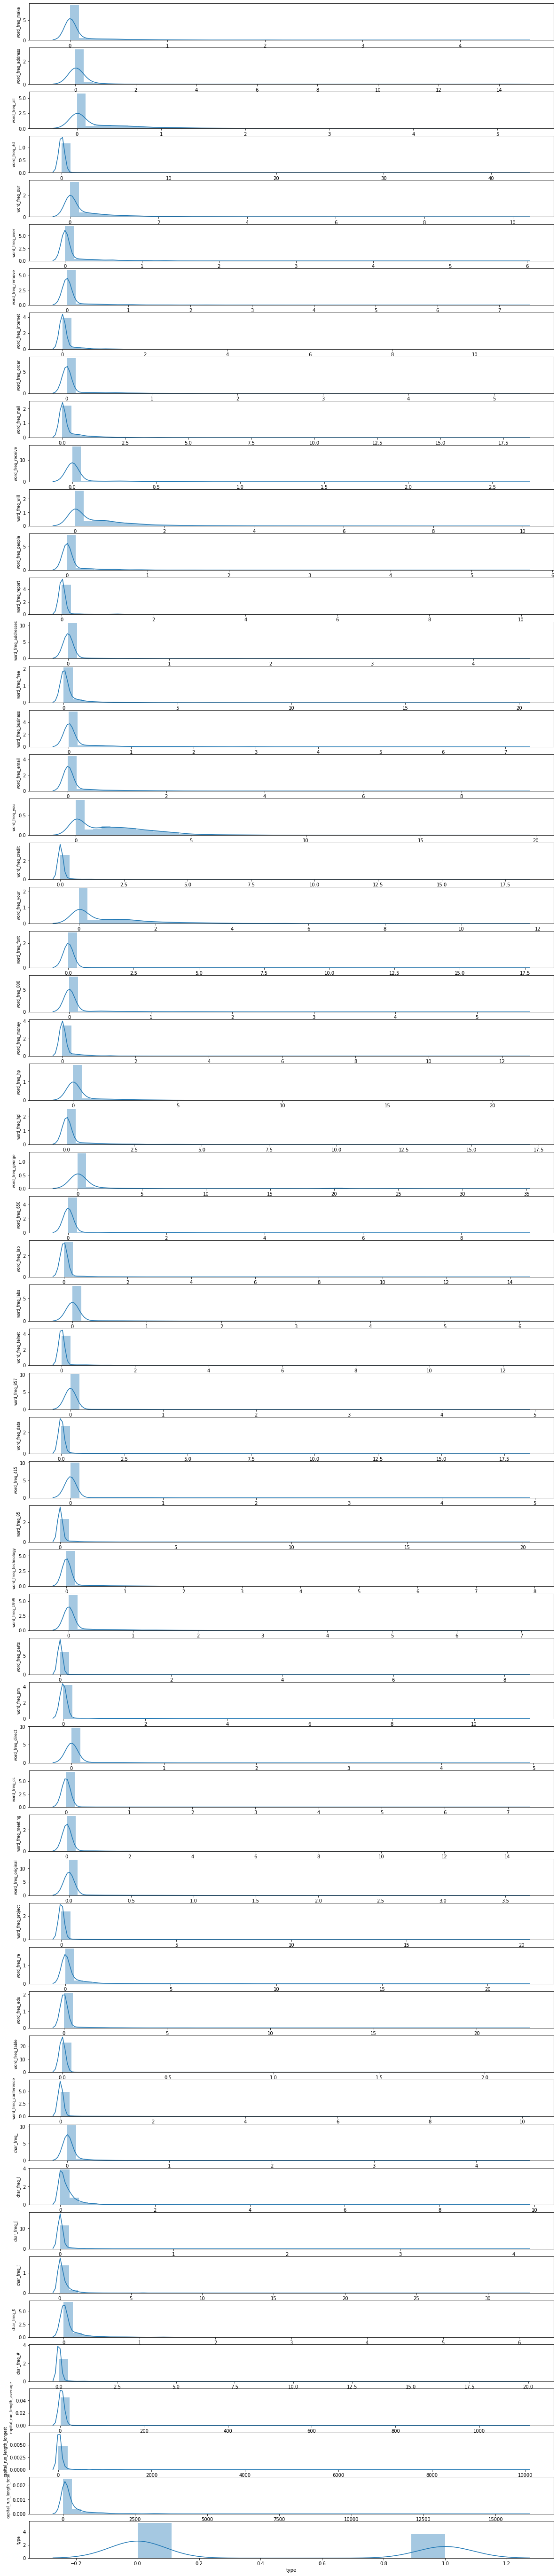

In [ ]:
#a loop for the plotting of histograms for the columns
columns = spam.columns
fig, ax = plt.subplots(len(columns), figsize=(20,100))

for i, col_val in enumerate(columns):

    sns.distplot(spam[col_val], hist=True, ax=ax[i])
    ax[i].set_ylabel(col_val, fontsize=8)

plt.show()

It is visible that most column values are in the range of 0.

In [6]:
#building the correlation matrix
corr_matrix = spam.corr().abs()
corr_matrix

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
word_freq_make,1.000000,0.019076,0.058697,0.012661,0.017461,0.055140,0.003686,0.007575,0.102287,0.036295,0.185152,0.099997,0.062431,0.034486,0.025914,0.055488,0.077872,0.048790,0.124958,0.019050,0.192320,0.026036,0.130623,0.185842,0.077357,0.066059,0.069783,0.052034,0.043662,0.056074,0.041384,0.034114,0.043540,0.029762,0.047817,0.058196,0.062019,0.008801,0.013654,0.038752,0.011389,0.028518,0.027202,0.023924,0.041355,0.036876,0.001935,0.019333,0.028758,0.027645,0.035528,0.054998,0.113713,0.010283,0.043098,0.058291,0.083717
word_freq_address,0.019076,1.000000,0.037364,0.007237,0.026681,0.027235,0.001995,0.018048,0.005977,0.030610,0.008845,0.044163,0.020971,0.010374,0.004079,0.011134,0.020545,0.031295,0.059736,0.016934,0.021880,0.009638,0.022468,0.000578,0.045779,0.040282,0.031862,0.030802,0.023066,0.029041,0.019178,0.004276,0.026088,0.005267,0.025400,0.029849,0.026218,0.009323,0.020343,0.016065,0.016232,0.026347,0.003736,0.020597,0.018427,0.025195,0.010296,0.016496,0.008337,0.053155,0.019572,0.016215,0.011653,0.001266,0.001358,0.001321,0.025668
word_freq_all,0.058697,0.037364,1.000000,0.021399,0.069293,0.080661,0.030585,0.006351,0.087497,0.024231,0.042147,0.073025,0.041155,0.004787,0.118814,0.057830,0.029535,0.115371,0.132350,0.027655,0.147829,0.038498,0.118309,0.036784,0.095869,0.069514,0.114669,0.056092,0.061766,0.037711,0.042702,0.065415,0.058961,0.065294,0.053008,0.052148,0.074660,0.031306,0.018867,0.051446,0.033802,0.009624,0.049146,0.056602,0.057591,0.061372,0.027967,0.028954,0.036902,0.027025,0.036737,0.103419,0.081647,0.005609,0.095625,0.102951,0.061200
word_freq_3d,0.012661,0.007237,0.021399,1.000000,0.002458,0.010698,0.019270,0.009789,0.003068,0.005660,0.013558,0.020356,0.013812,0.011688,0.002352,0.006879,0.002874,0.018785,0.011930,0.005700,0.007271,0.027890,0.010842,0.034994,0.015833,0.014296,0.011124,0.010815,0.008115,0.010910,0.007835,0.006988,0.008409,0.007005,0.006499,0.006978,0.008386,0.002781,0.004945,0.007997,0.005899,0.008424,0.009663,0.006174,0.013540,0.009559,0.003483,0.002134,0.000889,0.013296,0.007443,0.003632,0.010309,0.000491,0.005056,0.021656,0.020632
word_freq_our,0.017461,0.026681,0.069293,0.002458,1.000000,0.048482,0.143306,0.025317,0.015471,0.028437,0.063774,0.058814,0.026030,0.000496,0.053249,0.078437,0.138941,0.056870,0.092881,0.028841,0.127555,0.022309,0.065548,0.003574,0.078575,0.081017,0.092371,0.065781,0.029384,0.056178,0.045474,0.029310,0.035130,0.029557,0.053358,0.053233,0.078577,0.130403,0.045332,0.024697,0.049785,0.112708,0.052638,0.013149,0.047661,0.081751,0.028236,0.034050,0.035612,0.054496,0.029155,0.020993,0.036664,0.000279,0.050957,0.048350,0.005152
word_freq_over,0.055140,0.027235,0.080661,0.010698,0.048482,1.000000,0.057312,0.076174,0.113423,0.008739,0.049950,0.002193,0.073581,0.007244,0.170946,0.015709,0.059907,0.073835,0.091308,0.056798,0.100795,0.006318,0.208250,0.056535,0.089423,0.091854,0.072498,0.069718,0.051163,0.051462,0.048777,0.038954,0.036728,0.039464,0.057277,0.056417,0.062281,0.018804,0.050311,0.032565,0.031237,0.057406,0.033614,0.030696,0.058056,0.035928,0.015383,0.033347,0.02

In [7]:
#selecting the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#finding the index of columns with correlation greater than 0.9 and assigning them to "to_drop"
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [ ]:
#viewing the columns with a high correlation 
to_drop

['word_freq_415']

In [8]:
#dropping the highly correlated column.
spam = spam.drop(columns=to_drop)

# **Naive Bayes Modelling**

We will create a baseline model with the Naive Bayes Classifier without any tweaking of anything for it to be used as a comparison plane as we improve it.

## **Baseline Model**

In [9]:
#declaring our independent and dependent variables
y = spam['type']
test_features = spam.columns.to_list()
test_features.remove('type')
x = spam[test_features]

#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
#creating the model, and fitting it to our variables
nbc = GaussianNB()  
nbc = nbc.fit(x_train, y_train)

#predicting using the model
y_pred = nbc.predict(x_test)

#printing the metrics for the model.
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[403 126]
 [ 20 336]]
              precision    recall  f1-score   support

           0       0.95      0.76      0.85       529
           1       0.73      0.94      0.82       356

    accuracy                           0.84       885
   macro avg       0.84      0.85      0.83       885
weighted avg       0.86      0.84      0.84       885

Accuracy: 0.8350282485875706


We can see that our model has an accuracy of 83.5028%. This is fairly good, considerig it has not undergone any optimization.

The confusion matrix also shows that it has predicted more false positives compared to false negatives. It also shows that the model's precision is lower compared to its recall.

## **Improving The Model.**

We will employ several techniques and methods here to see whether we can improve our model better.

**Feature Selection**

In [11]:
#using linear discriminant analysis to select the appropriate features to use in prediction.
#building the model, fitting it, and transforming our variables
#deriving the coefficients for our factors.
lda = LDA()
lda = lda.fit(x, y)
lda_x = lda.transform(x)
lda.coef_

array([[-4.93725004e-01, -1.31682375e-01,  3.36998825e-01,
         1.10047054e-01,  7.68177304e-01,  1.08333143e+00,
         1.99851693e+00,  8.72700620e-01,  6.64282547e-01,
         1.29629221e-01,  5.68745098e-01, -2.94197942e-01,
         6.59963685e-02,  3.07024182e-02,  1.86584992e-01,
         6.99454271e-01,  4.90785367e-01,  5.14900189e-01,
         1.18074475e-01,  5.79221631e-01,  4.70203395e-01,
         4.15267236e-01,  1.65406337e+00,  8.68292444e-01,
        -2.35834044e-01, -2.19776812e-01, -1.28056921e-01,
         3.21941884e-02, -6.97976478e-02, -4.99970195e-01,
        -2.17876147e-01,  6.34712815e-01, -4.32261296e-01,
        -3.10162572e-01,  2.05716891e-01, -3.50587584e-01,
        -5.09361613e-01, -1.93187941e-01,  3.87355118e-01,
        -9.09797278e-02, -3.69893255e-01, -6.22551536e-01,
        -3.32636586e-01, -3.55614411e-01, -3.84743877e-01,
        -1.91491101e+00, -5.91911865e-01, -1.36649823e+00,
        -6.98160118e-01, -6.48871228e-01,  6.38058207e-0

In [12]:
#passing our coefficients to a dataframe
#putting them in descending order for us to choose the most influential ones.
factors = pd.DataFrame(index=x.columns.values, data=lda.coef_[0].T)
pd.options.display.float_format='{:.8f}'.format
factors.sort_values(0, ascending = False).head(25)

,0
char_freq_$,2.22053508
word_freq_remove,1.99851693
word_freq_000,1.65406337
word_freq_over,1.08333143
word_freq_internet,0.87270062
word_freq_money,0.86829244
word_freq_our,0.76817730
word_freq_free,0.69945427
word_freq_order,0.66428255
char_freq_!,0.63805821


In [13]:
#storing the columns chosen in a list.
lda_columns = ['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_over', 'word_freq_internet', 'word_freq_money', 'word_freq_our', 'word_freq_free', 'word_freq_order', 'char_freq_!', 'word_freq_857', 'word_freq_credit', 'word_freq_receive', 'word_freq_email', 'word_freq_business', 'word_freq_your', 'word_freq_font', 'word_freq_direct', 'word_freq_all', 'char_freq_#', 'word_freq_technology', 'word_freq_addresses', 'word_freq_mail', 'word_freq_you', 'word_freq_3d', 'type']

In [14]:
#declaring the independent and dependent variables.
y1 = spam['type']

test_features1 = lda_columns
test_features1.remove('type')


x1 = spam[test_features1]
#splitting the dataset.
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

In [15]:
#creating the model and fittng it.
nbc = GaussianNB()  
nbc = nbc.fit(x1_train, y1_train)

#predicting using the model
y1_pred = nbc.predict(x1_test)

#viewing the appropriate metrics for the model perfomance.
print(confusion_matrix(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))
print('Accuracy:', accuracy_score(y1_test, y1_pred))

[[495  34]
 [123 233]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       529
           1       0.87      0.65      0.75       356

    accuracy                           0.82       885
   macro avg       0.84      0.80      0.81       885
weighted avg       0.83      0.82      0.82       885

Accuracy: 0.8225988700564971


Our accuracy has reduced after perfoming the feature reduction(82.26%).

However, the precision has become better, while the recall has reduced and this is a better result.

**Balancing the Spam Types**

In [16]:
#viewing the balance in the class of spam type.
type_0 = spam[spam['type']==0]
type_1 = spam[spam['type']==1]

print('Non-Spam Messages:', len(type_0))
print('Spam Messages:', len(type_1))

Non-Spam Messages: 2633
Spam Messages: 1791


In [17]:
#oversampling and undersampling the class values in order for comparison for the better method.
type_1_o = resample(type_1, replace=True, n_samples=type_0.shape[0])
type_0_u = resample(type_0, replace=True, n_samples=type_1.shape[0])

#applying the oversampled variable to the dataset.
spam_1 = pd.concat([type_1_o, type_0])
print('Non-spam Messages', len(spam_1[spam_1['type']==0]))
print('Spam Messages', len(spam_1[spam_1['type']==1]))

Non-spam Messages 2633
Spam Messages 2633


In [18]:
#declaring the independent and dependent variables
y2 = spam_1['type']

x2 = spam_1[test_features1]

#splitting the data.
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=0)

In [19]:
#creating and fitting the model.
nbc = GaussianNB()  
nbc = nbc.fit(x2_train, y2_train)

#predicting using the model
y2_pred = nbc.predict(x2_test)

#determining the perfomance of the model.
print(confusion_matrix(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))
print('Accuracy:', accuracy_score(y2_test, y2_pred))

[[482  33]
 [198 341]]
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       515
           1       0.91      0.63      0.75       539

    accuracy                           0.78      1054
   macro avg       0.81      0.78      0.78      1054
weighted avg       0.81      0.78      0.78      1054

Accuracy: 0.7808349146110057


After oversampling our spam types, we have attained an accuracy of 78.0835% which is much lower than the base model.

We are going to try out the undersampling in order to see wherher the perfomance will be better.

In [21]:
#incorporating the undersampled variables
spam_2 = pd.concat([type_0_u, type_1])
print('Non-spam Messages', len(spam_2[spam_2['type']==0]))
print('Spam Messages', len(spam_2[spam_2['type']==1]))

Non-spam Messages 1791
Spam Messages 1791


In [22]:
#declaring the independent and dependent variables
y3 = spam_2['type']

x3 = spam_2[test_features1]

#splitting the dataset.
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=0)

In [23]:
#creating and fitting the model
nbc = GaussianNB()  
nbc = nbc.fit(x3_train, y3_train)

#predicting using the model
y3_pred = nbc.predict(x3_test)

#determining the metrics for the perfomance of the model
print(confusion_matrix(y3_test, y3_pred))
print(classification_report(y3_test, y3_pred))
print('Accuracy:', accuracy_score(y3_test, y3_pred))

[[347  23]
 [129 218]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       370
           1       0.90      0.63      0.74       347

    accuracy                           0.79       717
   macro avg       0.82      0.78      0.78       717
weighted avg       0.81      0.79      0.78       717

Accuracy: 0.7880055788005579


We have attained a better accuracy of 78.8001% which is a little better than the oversampled model.

Although it is still lower than the base model, we are going to choose this undersampled dataframe for use.

**Scaling**

In [25]:
#declaring the independent and dependent variables
y4 = spam_2['type']

x4 = spam_2[test_features1]

#splitting the dataset
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=0)

In [26]:
#defining the scaler and fitting it to our data
std_scl = StandardScaler()
std_scl.fit(x4_train)

#transforming the variables using the scaler.
x4_train = std_scl.transform(x4_train)
x4_test = std_scl.transform(x4_test)

In [27]:
#creating and defining the model
nbc = GaussianNB()  
nbc = nbc.fit(x4_train, y4_train)

#predicting using the model
y4_pred = nbc.predict(x4_test)

#finding the metrics for the model perfomance.
print(confusion_matrix(y4_test, y4_pred))
print(classification_report(y4_test, y4_pred))
print('Accuracy:', accuracy_score(y4_test, y4_pred))

[[347  23]
 [129 218]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       370
           1       0.90      0.63      0.74       347

    accuracy                           0.79       717
   macro avg       0.82      0.78      0.78       717
weighted avg       0.81      0.79      0.78       717

Accuracy: 0.7880055788005579


We have attained the same accuracy as before, and all the other values are identical.

The scaling doesn't change anything which means the data may be okay as it is.

**70-30 Split**

In [39]:
#declaring the independent and dependent variables
y5 = spam_2['type']

x5 = spam_2[test_features1]

#splitting the dataset.
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.3, random_state=0)

In [40]:
#creating the model and fitting it
nbc = GaussianNB()  
nbc = nbc.fit(x5_train, y5_train)

#prediting using the model.
y5_pred = nbc.predict(x5_test)

#Determining the metrics for the perfomance of the model
print(confusion_matrix(y5_test, y5_pred))
print(classification_report(y5_test, y5_pred))
print('Accuracy:', accuracy_score(y5_test, y5_pred))

[[517  36]
 [200 322]]
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       553
           1       0.90      0.62      0.73       522

    accuracy                           0.78      1075
   macro avg       0.81      0.78      0.77      1075
weighted avg       0.81      0.78      0.77      1075

Accuracy: 0.7804651162790698


The accuracy has decreased with the 70-30 split(78.0465%)

**60-40 Split**

In [42]:
#declaring the independent and dependent variables
y6 = spam_2['type']

x6 = spam_2[test_features1]

#splitting the data
x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size=0.4, random_state=0)

In [43]:
#creating the model and fitting it
nbc = GaussianNB()  
nbc = nbc.fit(x6_train, y6_train)

#prediting using the model.
y6_pred = nbc.predict(x6_test)

#Determining the metrics for the perfomance of the model
print(confusion_matrix(y6_test, y6_pred))
print(classification_report(y6_test, y6_pred))
print('Accuracy:', accuracy_score(y6_test, y6_pred))

[[692  49]
 [258 434]]
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       741
           1       0.90      0.63      0.74       692

    accuracy                           0.79      1433
   macro avg       0.81      0.78      0.78      1433
weighted avg       0.81      0.79      0.78      1433

Accuracy: 0.7857641311933008


We ave attained an accuracy of 78.5764% which is a bit better compared to the previous split.

We are going to try out the Multinomial Naive Bayes Classifier to see its perfomance.

## **Multinomial Naive Bayes Classifier**

In [44]:
#declaring the independent and dependent variables
y7 = spam_2['type']

x7 = spam_2[test_features1]

#splitting the dataset.
x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=0.2, random_state=0)

In [45]:
#creating the model.
mnb = MultinomialNB()
mnb.fit(x7_train, y7_train)

#predicting using the model
y7_pred = mnb.predict(x7_test)

#Determining the metrics for the perfomance of the model
print(confusion_matrix(y7_test, y7_pred))
print(classification_report(y7_test, y7_pred))
print('Accuracy:', accuracy_score(y7_test, y7_pred))

[[240 130]
 [ 60 287]]
              precision    recall  f1-score   support

           0       0.80      0.65      0.72       370
           1       0.69      0.83      0.75       347

    accuracy                           0.74       717
   macro avg       0.74      0.74      0.73       717
weighted avg       0.75      0.74      0.73       717

Accuracy: 0.7350069735006973


We get a lower accuracy score and this shows that this model is not ideal for this dataset

# **Conclusion**

We have attained the following accuracy scores for the models we have created.

* Baseline Model - 0.8350282485875706
* Feature Slection Model - 0.8225988700564971
* OverSampled Model - 0.7808349146110057
* Undersampled Model - 0.7880055788005579
* Scaling Model - 0.7880055788005579

* 70-20 Split Model - 0.7804651162790698
* 60-40 Split Model - 0.7857641311933008

* Multinomial Naive Bayes - 0.7350069735006973

From the above stated, the baseline model achieved the highest accuracy score followed by the feature selected model. However, the feature selected model has a higher precision compared to the baseline model. This is better as it more usable.

The other models perform worse than the feature selected model.

The feature selected model is thus the better for use as it has a good precision and recall and a higher accuracy.

# **Follow up questions**

## **Did we have the right data?**

Yes. The data is great for our model.

## **Do we need other data to answer our question?**

We don't need aadditional data. The data we have is enough for our analysis and our project.

## **Did we have the right question?**

Yes, the question was relevant to our project.